In [1]:
! pip install pyjanitor

In [2]:
import numpy as np
import pandas as pd 
import janitor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Đọc dữ liệu

In [4]:
daily = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

## Covert lại tên cột

In [5]:
daily = daily.clean_names(case_type="snake")
sleep = sleep.clean_names(case_type="snake")

In [6]:
print(daily.info(), "\n \n \n \n")
print(daily.describe(),"\n \n \n \n")
daily.head(-5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          940 non-null    int64  
 1   activity_date               940 non-null    object 
 2   total_steps                 940 non-null    int64  
 3   total_distance              940 non-null    float64
 4   tracker_distance            940 non-null    float64
 5   logged_activities_distance  940 non-null    float64
 6   very_active_distance        940 non-null    float64
 7   moderately_active_distance  940 non-null    float64
 8   light_active_distance       940 non-null    float64
 9   sedentary_active_distance   940 non-null    float64
 10  very_active_minutes         940 non-null    int64  
 11  fairly_active_minutes       940 non-null    int64  
 12  lightly_active_minutes      940 non-null    int64  
 13  sedentary_minutes           940 non

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,8877689391,5/3/2016,10818,8.210000,8.210000,0.0,1.39,0.10,6.67,0.01,19,3,229,1189,2817
931,8877689391,5/4/2016,18193,16.299999,16.299999,0.0,10.42,0.31,5.53,0.00,66,8,212,1154,3477
932,8877689391,5/5/2016,14055,10.670000,10.670000,0.0,5.46,0.82,4.37,0.00,67,15,188,1170,3052
933,8877689391,5/6/2016,21727,19.340000,19.340000,0.0,12.79,0.29,6.16,0.00,96,17,232,1095,4015


In [7]:
print(sleep.info(), "\n \n \n \n")
print(sleep.describe(),"\n \n \n \n")
sleep.head(-5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    413 non-null    int64 
 1   sleep_day             413 non-null    object
 2   total_sleep_records   413 non-null    int64 
 3   total_minutes_asleep  413 non-null    int64 
 4   total_time_in_bed     413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB
None 
 
 
 

                 id  total_sleep_records  total_minutes_asleep  \
count  4.130000e+02           413.000000            413.000000   
mean   5.000979e+09             1.118644            419.467312   
std    2.060360e+09             0.345521            118.344679   
min    1.503960e+09             1.000000             58.000000   
25%    3.977334e+09             1.000000            361.000000   
50%    4.702922e+09             1.000000            433.000000   
75%    6.962181e+09 

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
403,8792009665,4/22/2016 12:00:00 AM,1,391,407
404,8792009665,4/23/2016 12:00:00 AM,1,339,360
405,8792009665,4/27/2016 12:00:00 AM,1,423,428
406,8792009665,4/28/2016 12:00:00 AM,1,402,416


## Convert lại ngày giờ

In [8]:
daily["activity_date"] = pd.to_datetime(daily["activity_date"],errors="coerce")
sleep["sleep_day"] = pd.to_datetime(
    sleep["sleep_day"],
    format = "%m/%d/%Y %I:%M:%S %p",
    errors="coerce"
)


In [9]:
daily.head(-5)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,8877689391,2016-05-03,10818,8.210000,8.210000,0.0,1.39,0.10,6.67,0.01,19,3,229,1189,2817
931,8877689391,2016-05-04,18193,16.299999,16.299999,0.0,10.42,0.31,5.53,0.00,66,8,212,1154,3477
932,8877689391,2016-05-05,14055,10.670000,10.670000,0.0,5.46,0.82,4.37,0.00,67,15,188,1170,3052
933,8877689391,2016-05-06,21727,19.340000,19.340000,0.0,12.79,0.29,6.16,0.00,96,17,232,1095,4015


In [10]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          940 non-null    int64         
 1   activity_date               940 non-null    datetime64[ns]
 2   total_steps                 940 non-null    int64         
 3   total_distance              940 non-null    float64       
 4   tracker_distance            940 non-null    float64       
 5   logged_activities_distance  940 non-null    float64       
 6   very_active_distance        940 non-null    float64       
 7   moderately_active_distance  940 non-null    float64       
 8   light_active_distance       940 non-null    float64       
 9   sedentary_active_distance   940 non-null    float64       
 10  very_active_minutes         940 non-null    int64         
 11  fairly_active_minutes       940 non-null    int64         

In [11]:
daily.describe()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862


In [12]:
sleep.head(-5)

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712
...,...,...,...,...,...
403,8792009665,2016-04-22,1,391,407
404,8792009665,2016-04-23,1,339,360
405,8792009665,2016-04-27,1,423,428
406,8792009665,2016-04-28,1,402,416


In [13]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    413 non-null    int64         
 1   sleep_day             413 non-null    datetime64[ns]
 2   total_sleep_records   413 non-null    int64         
 3   total_minutes_asleep  413 non-null    int64         
 4   total_time_in_bed     413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


In [14]:
sleep.describe()

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
count,4.130000e+02,413,413.000000,413.000000,413.000000
mean,5.000979e+09,2016-04-26 12:40:05.811137792,1.118644,419.467312,458.639225
min,1.503960e+09,2016-04-12 00:00:00,1.000000,58.000000,61.000000
25%,3.977334e+09,2016-04-19 00:00:00,1.000000,361.000000,403.000000
50%,4.702922e+09,2016-04-27 00:00:00,1.000000,433.000000,463.000000
75%,6.962181e+09,2016-05-04 00:00:00,1.000000,490.000000,526.000000
max,8.792010e+09,2016-05-12 00:00:00,3.000000,796.000000,961.000000
std,2.060360e+09,NaN,0.345521,118.344679,127.101607


## Xử lý giá trị null

In [15]:
print("Number of null data of daily_acti \n",daily.isna().sum(), "\n")
print("Number of null data of sleep \n",sleep.isna().sum(), "\n")

Number of null data of daily_acti 
 id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
dtype: int64 

Number of null data of sleep 
 id                      0
sleep_day               0
total_sleep_records     0
total_minutes_asleep    0
total_time_in_bed       0
dtype: int64 



## Xử lý dữ liệu trùng

In [16]:
print("Number of duplicate avt: ",daily.duplicated().sum())
print("Number of duplicate sleep: ",sleep.duplicated().sum())

Number of duplicate avt:  0
Number of duplicate sleep:  3


In [17]:
sleep[sleep.duplicated()].head()

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
161,4388161847,2016-05-05,1,471,495
223,4702921684,2016-05-07,1,520,543
380,8378563200,2016-04-25,1,388,402


In [18]:
sleep.drop_duplicates(inplace=True)

In [19]:
print("Number of duplicate avt: ",daily.duplicated().sum())
print("Number of duplicate sleep: ",sleep.duplicated().sum())

Number of duplicate avt:  0
Number of duplicate sleep:  0


## Lấy ra các thứ trong tuần

In [20]:
daily["week_day"] = daily["activity_date"].dt.day_name()
sleep["week_day"] = sleep["sleep_day"].dt.day_name()

In [21]:
daily.head()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,week_day
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [22]:
sleep.head()

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,week_day
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


## Tính tổng thời gian hoạt động trong ngày và thời gian bắt đầu vào giấc ngủ

In [23]:
daily["total_active_minute"] = daily["very_active_minutes"]+daily["fairly_active_minutes"]+daily["lightly_active_minutes"]
sleep['time_to_sleep'] = sleep["total_time_in_bed"] - sleep["total_minutes_asleep"]


In [24]:
daily.head()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,week_day,total_active_minute
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,366
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,257
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,222
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,272
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,267


In [25]:
sleep.head()

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,week_day,time_to_sleep
0,1503960366,2016-04-12,1,327,346,Tuesday,19
1,1503960366,2016-04-13,2,384,407,Wednesday,23
2,1503960366,2016-04-15,1,412,442,Friday,30
3,1503960366,2016-04-16,2,340,367,Saturday,27
4,1503960366,2016-04-17,1,700,712,Sunday,12


## Join 2 bảng theo id, sleepday và weekday

In [26]:
daily_sleep = pd.merge(daily, sleep,  how="inner",  
    left_on=["id", "activity_date", "week_day"],
    right_on=["id", "sleep_day", "week_day"])

## Xử lý ngoại lệ

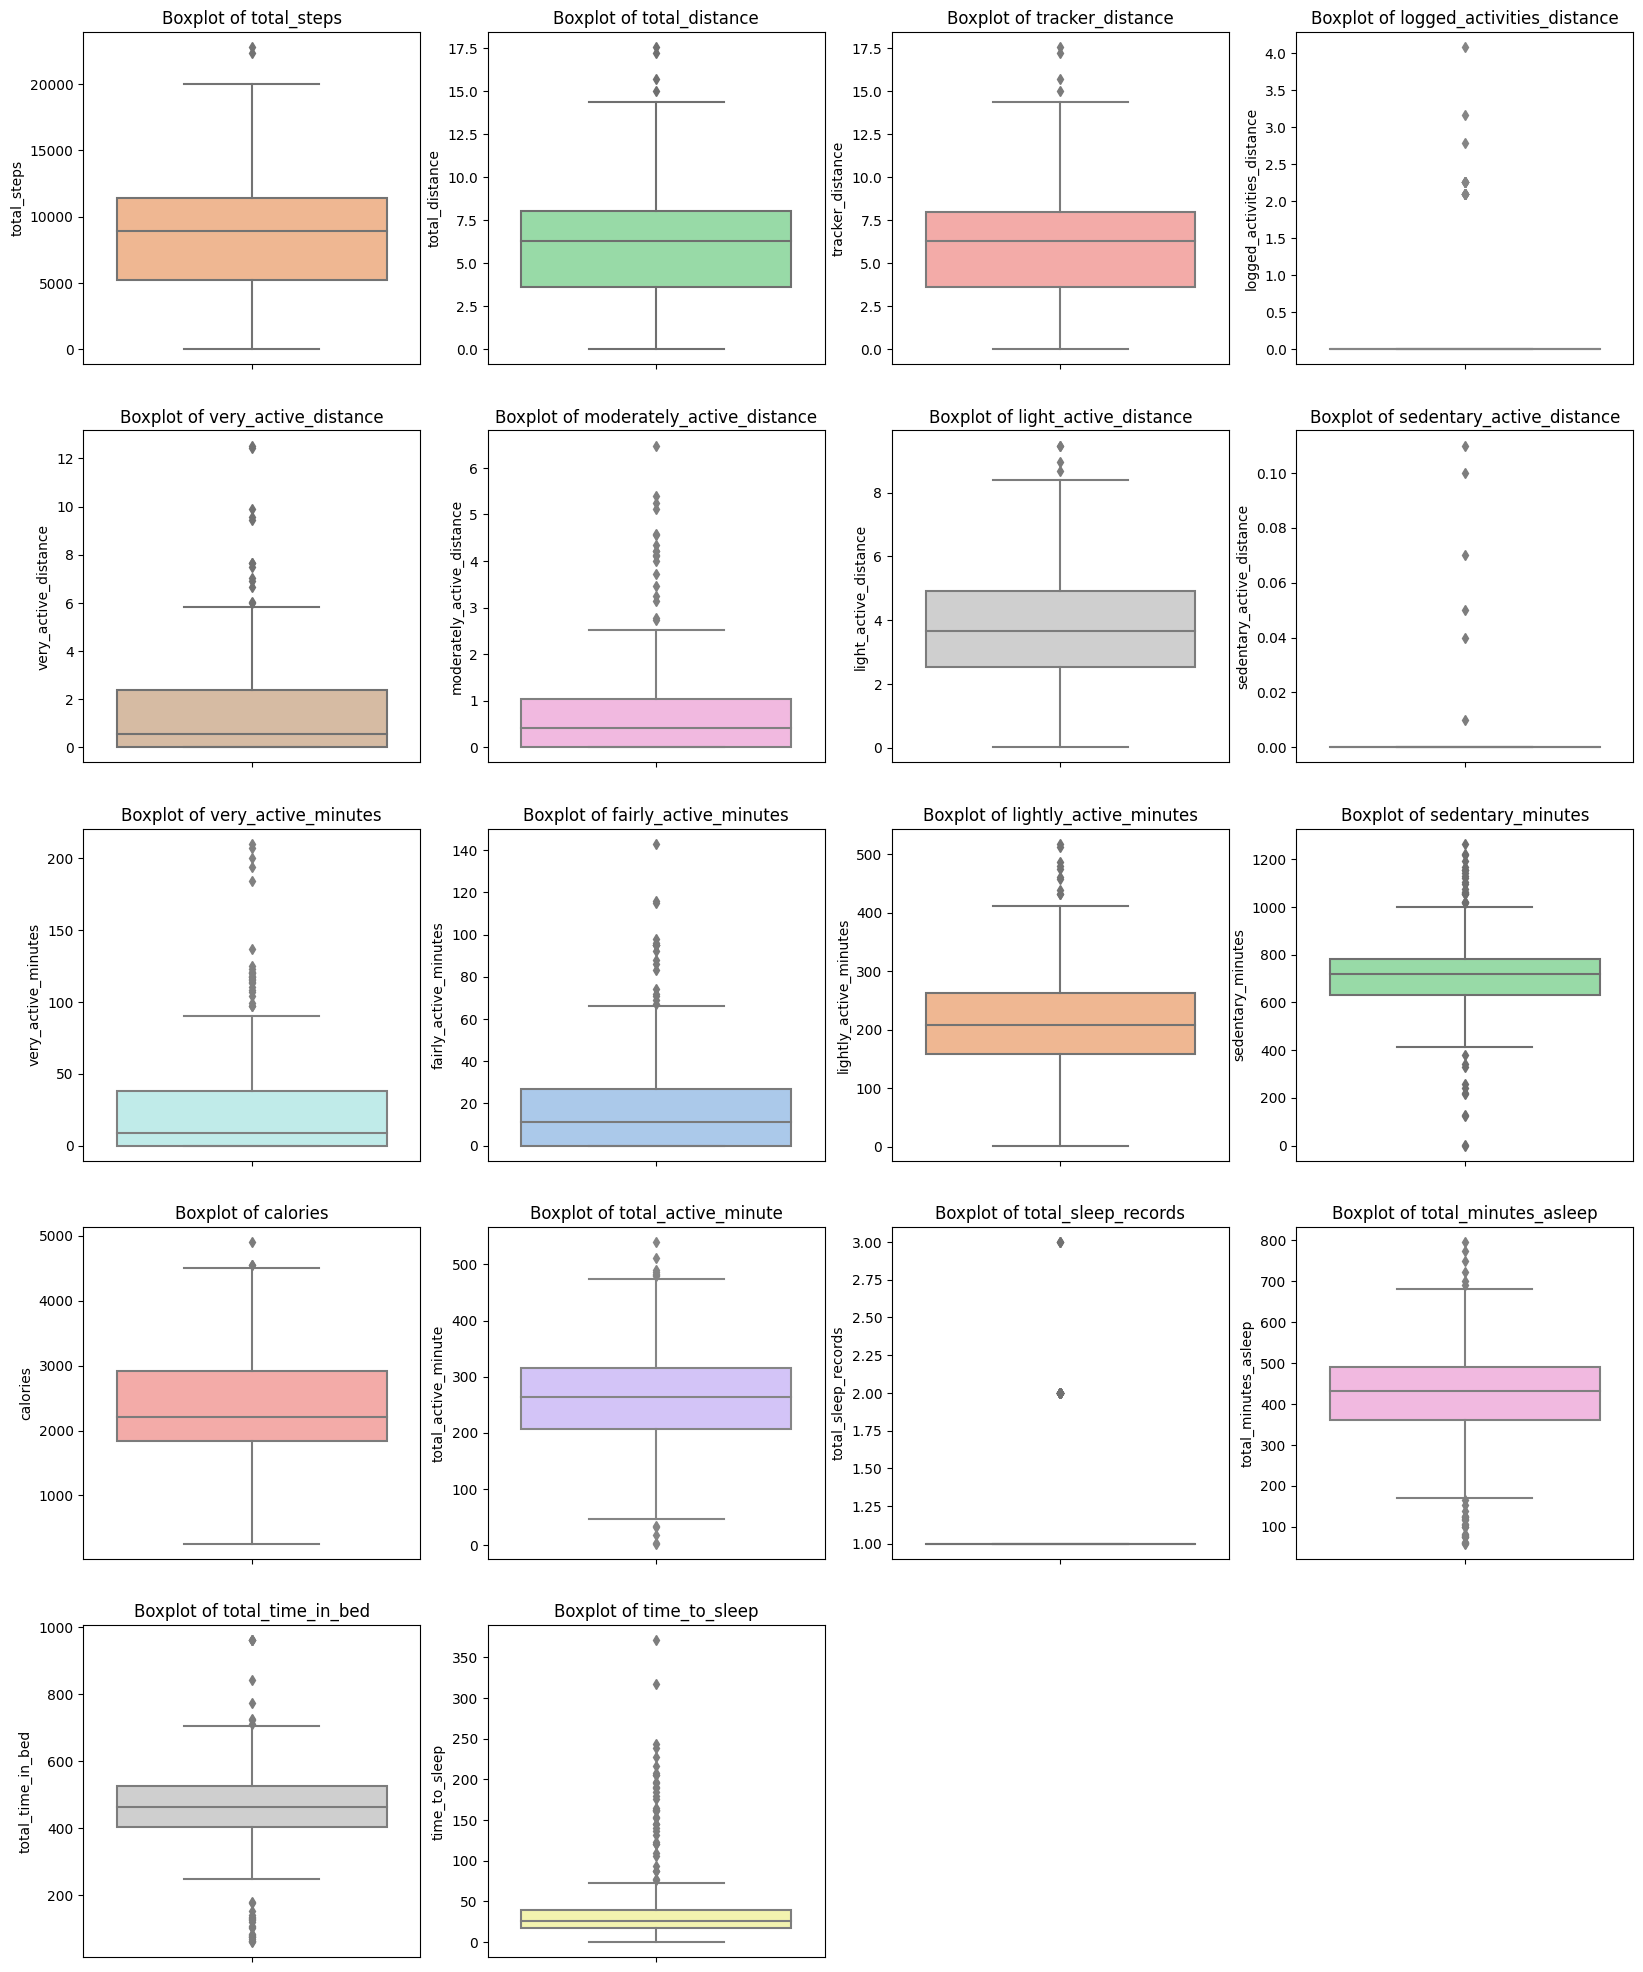

In [27]:
numeric_cols = daily_sleep.select_dtypes(include=[np.number]).columns.drop("id")
def handle_outliers(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_limit = df[col].quantile(0.25) - (IQR * 1.5)
    upper_limit = df[col].quantile(0.75) + (IQR * 1.5)

    df.loc[df[col] > upper_limit, col] = upper_limit
    df.loc[df[col] < lower_limit, col] = lower_limit

# Chạy vòng lặp qua các cột số và xử lý ngoại lệ
n_cols = 4
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=daily_sleep[col], color=sns.color_palette("pastel")[i % 10])
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel(col, fontsize=10)


Hầu hết các biến đều có nhiều outliers, cho thấy có những ngày người dùng hoạt động rất khác biệt so với mức trung bình, điều này là bình thường trong dữ liệu hoạt động hàng ngày.

## Kiểm tra độ tương quan giữa các biến bằng biểu đồ heatmap

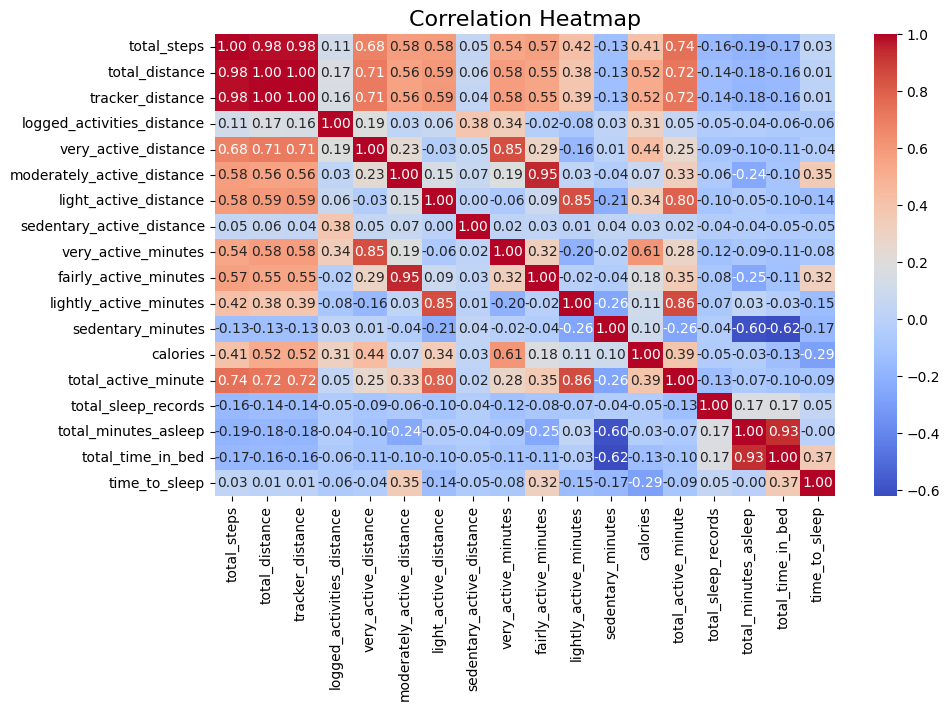

In [28]:
numeric_cols = daily_sleep.select_dtypes(include="number").drop(columns="id")

# Tính ma trận tương quan
corr = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


* total_minutes_asleep và total_time_in_bed: Tương quan rất cao (≈0.93). Người dành nhiều thời gian trên giường thường cũng có nhiều phút ngủ.
* time_to_sleep hầu như không liên quan đến các biến khác (tương quan gần 0).
* Giấc ngủ và vận động trong dữ liệu này dường như độc lập.

Giấc ngủ chất lượng
* Tốn <= 30 phút để chìm vào giấc ngủ sau khi nằm lên giường.
* Có hơn 85% thời gian bạn nằm trên giường thật sự ngủ.
* https://dripcare.vn/tin-tuc/thong-tin-y-khoa/the-nao-la-mot-giac-ngu-chat-luong

In [29]:
daily_sleep["sleep_quality"] = np.where((daily_sleep["time_to_sleep"] <=30) &
                                        (daily_sleep["total_minutes_asleep"] / daily_sleep["total_time_in_bed"])>0.85, "Good", "Bad")

In [30]:
daily_sleep.head()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,...,sedentary_minutes,calories,week_day,total_active_minute,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,time_to_sleep,sleep_quality
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,728,1985,Tuesday,366,2016-04-12,1,327,346,19,Good
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,776,1797,Wednesday,257,2016-04-13,2,384,407,23,Good
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,726,1745,Friday,272,2016-04-15,1,412,442,30,Good
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,773,1863,Saturday,267,2016-04-16,2,340,367,27,Good
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,539,1728,Sunday,222,2016-04-17,1,700,712,12,Good


In [31]:
daily_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          410 non-null    int64         
 1   activity_date               410 non-null    datetime64[ns]
 2   total_steps                 410 non-null    int64         
 3   total_distance              410 non-null    float64       
 4   tracker_distance            410 non-null    float64       
 5   logged_activities_distance  410 non-null    float64       
 6   very_active_distance        410 non-null    float64       
 7   moderately_active_distance  410 non-null    float64       
 8   light_active_distance       410 non-null    float64       
 9   sedentary_active_distance   410 non-null    float64       
 10  very_active_minutes         410 non-null    int64         
 11  fairly_active_minutes       410 non-null    int64         

## Trực quan dữ liệu

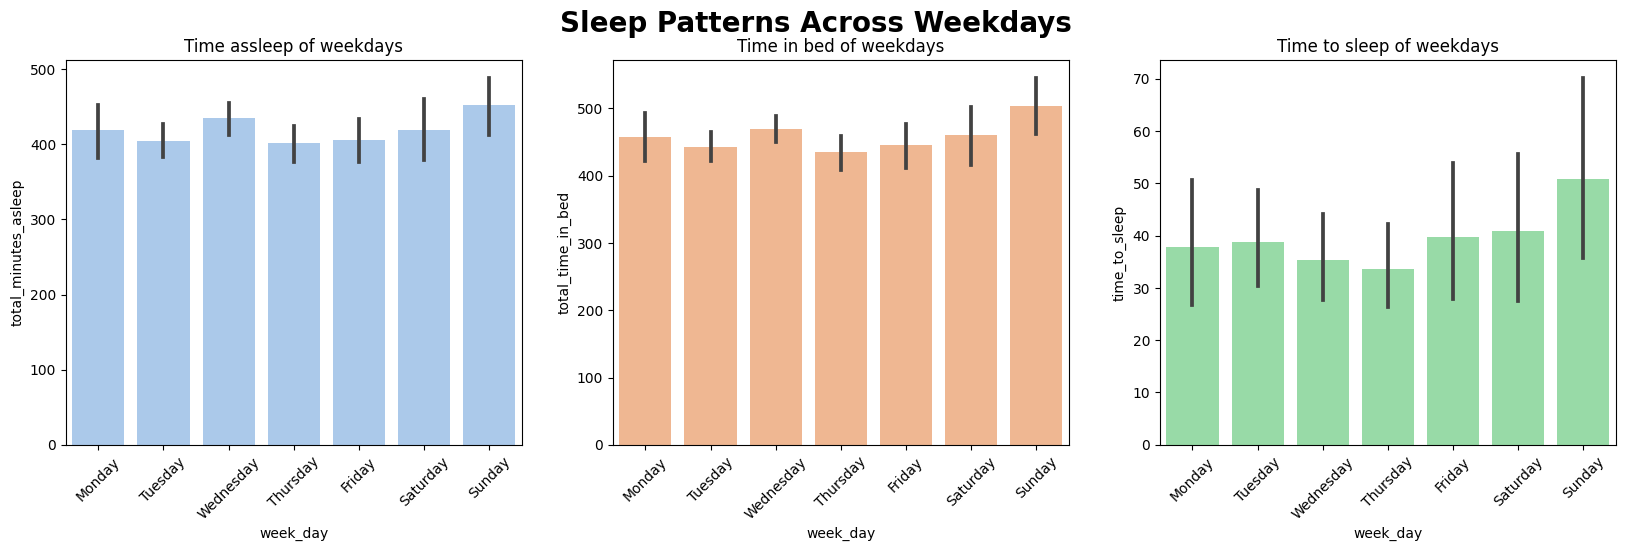

In [32]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(data = daily_sleep, x="week_day", y= "total_minutes_asleep",order=order, color = sns.color_palette("pastel")[0])
plt.xticks(rotation=45)
plt.title("Time assleep of weekdays")
plt.subplot(1,3,2)
sns.barplot(data = daily_sleep, x="week_day",y= "total_time_in_bed",order = order, color = sns.color_palette("pastel")[1])
plt.xticks(rotation=45)
plt.title("Time in bed of weekdays")
plt.subplot(1,3,3)
sns.barplot(data = daily_sleep, x="week_day", y="time_to_sleep",order = order, color = sns.color_palette("pastel")[2])
plt.xticks(rotation=45);
plt.title("Time to sleep of weekdays")
plt.suptitle("Sleep Patterns Across Weekdays", fontsize=20, weight="bold");

* Người dùng có xu hướng ngủ muộn hơn, thức dậy muộn hơn, và mất nhiều thời gian hơn để đi vào giấc ngủ vào cuối tuần có thể là do sử dụng thiết bị điện tử buổi tối, uống cà phê, trà, nước tăng lực, rượu,...
* Thứ 5 là ngày có thời gian ngủ thấp nhất trong tuần thường là cao điểm công việc/học tập


In [33]:
number_sleep_quality = daily_sleep["sleep_quality"].value_counts()
number_sleep_quality

sleep_quality
Good    250
Bad     160
Name: count, dtype: int64

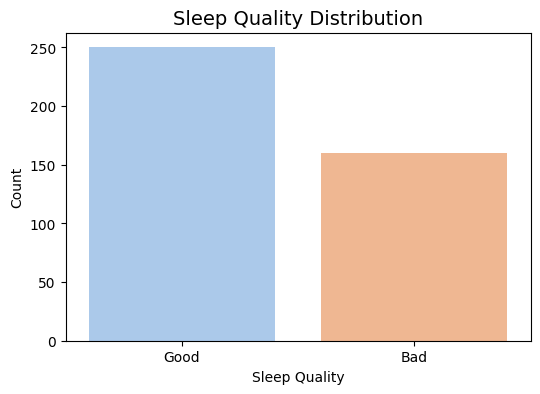

In [34]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=daily_sleep["sleep_quality"].value_counts().index,
    y=daily_sleep["sleep_quality"].value_counts().values,
    palette="pastel"
)

plt.title("Sleep Quality Distribution", fontsize=14)
plt.xlabel("Sleep Quality")
plt.ylabel("Count")
plt.show()


* Mặc dù chất lượng giấc ngủ tốt chiếm đa số nhưng chất lượng giấc ngủ kém vẫn cao, cho thấy cần có biện pháp cải thiện vệ sinh giấc ngủ để nâng cao chất lượng tổng thể.

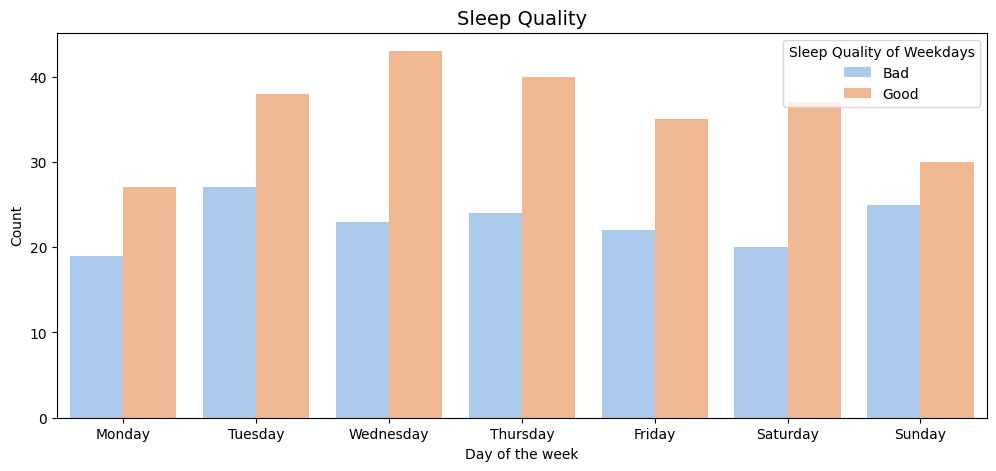

In [35]:
sleep_summary = daily_sleep.groupby(["week_day", "sleep_quality"]).size().reset_index(name="count")

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(12,5))
sns.barplot(
    data=sleep_summary,
    x="week_day",
    y="count",
    hue="sleep_quality",    
    order=order,
    palette="pastel"
)

plt.title("Sleep Quality", fontsize=14)
plt.xlabel("Day of the week")
plt.ylabel("Count")
plt.legend(title="Sleep Quality of Weekdays")
plt.show()


* Chất lượng ngủ tốt nhất: Thứ 4 – thứ 7.
* Chất lượng ngủ kém nhất: Chủ nhật - thứ 3.
* Xu hướng này phản ánh ảnh hưởng của công việc/học tập và nhịp sinh học hàng tuần: đầu tuần thường khó thích nghi, giữa tuần ổn định, cuối tuần thoải mái nhưng Chủ Nhật lại lo lắng chuẩn bị cho tuần mới.

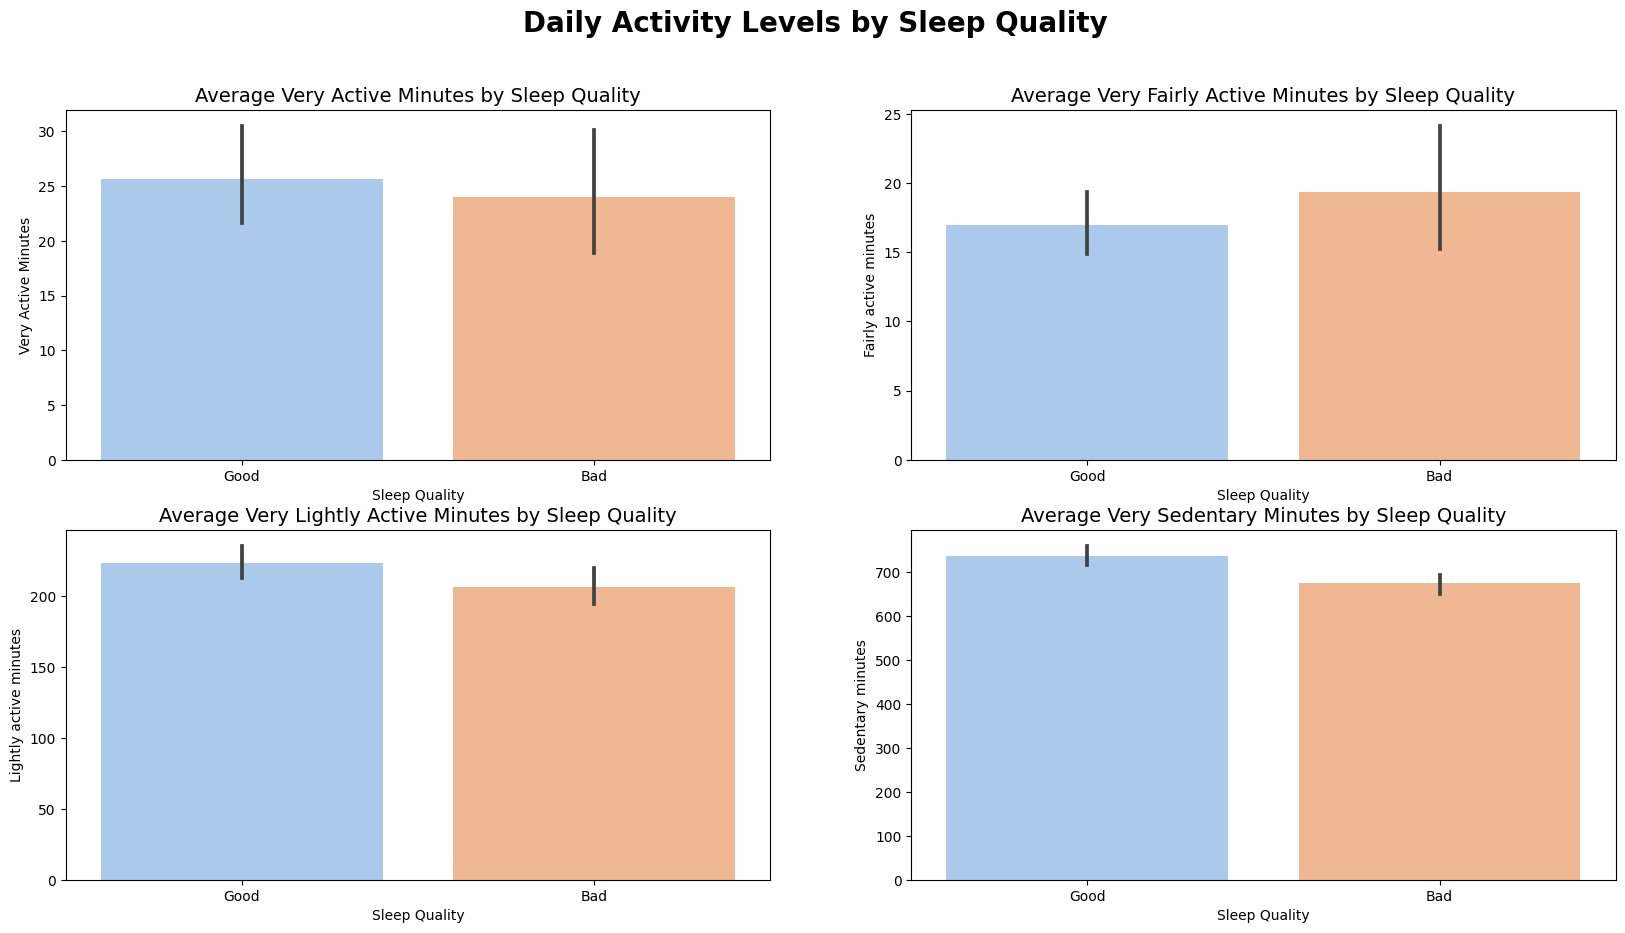

In [36]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(
    data=daily_sleep,
    x="sleep_quality",
    y="very_active_minutes",
    estimator="mean",
    palette="pastel"
)

plt.title("Average Very Active Minutes by Sleep Quality", fontsize=14)
plt.xlabel("Sleep Quality")
plt.ylabel("Very Active Minutes")

plt.subplot(2,2,2)
sns.barplot(
    data=daily_sleep,
    x="sleep_quality",
    y="fairly_active_minutes",
    estimator="mean",
    palette="pastel"
)

plt.title("Average Very Fairly Active Minutes by Sleep Quality", fontsize=14)
plt.xlabel("Sleep Quality")
plt.ylabel("Fairly active minutes")

plt.subplot(2,2,3)
sns.barplot(
    data=daily_sleep,
    x="sleep_quality",
    y="lightly_active_minutes",
    estimator="mean",
    palette="pastel"
)

plt.title("Average Very Lightly Active Minutes by Sleep Quality", fontsize=14)
plt.xlabel("Sleep Quality")
plt.ylabel("Lightly active minutes")

plt.subplot(2,2,4)
sns.barplot(
    data=daily_sleep,
    x="sleep_quality",
    y="sedentary_minutes",
    estimator="mean",
    palette="pastel"
)

plt.title("Average Very Sedentary Minutes by Sleep Quality", fontsize=14)
plt.xlabel("Sleep Quality")
plt.ylabel("Sedentary minutes")
plt.suptitle("Daily Activity Levels by Sleep Quality", fontsize=20, weight="bold");


* Giấc ngủ tốt liên quan đến việc duy trì được nhiều hoạt động nhẹ (lightly active) trong ngày, chứ không phải chỉ tập trung vào vận động mạnh.
* chất lượng giấc ngủ kém lại liên quan đến việc có nhiều hoạt động ở mức vừa (fairly active), có thể do cơ thể phải “cố gắng” tiêu hao năng lượng nhiều hơn, hoặc do hoạt động ban ngày chưa cân đối.
* Nhóm ngủ tốt lại ngồi nhiều hơn → cho thấy việc ngủ ngon không hoàn toàn phụ thuộc vào giảm sedentary time, mà quan trọng hơn là phân bổ hợp lý hoạt động nhẹ và vận động mạnh.

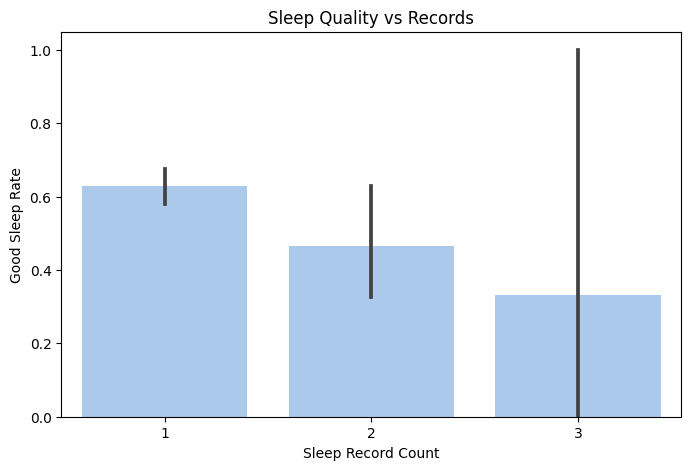

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=daily_sleep,
    x="total_sleep_records",
    y=daily_sleep["sleep_quality"].eq("Good").astype(int),  # Good=1, Bad=0
    estimator="mean",
    color=sns.color_palette("pastel")[0]
)
plt.ylabel("Good Sleep Rate")
plt.xlabel("Sleep Record Count")
plt.title("Sleep Quality vs Records")
plt.show()


* Người có thói quen ngủ một giấc chính, liền mạch trong ngày thường có chất lượng giấc ngủ tốt hơn.

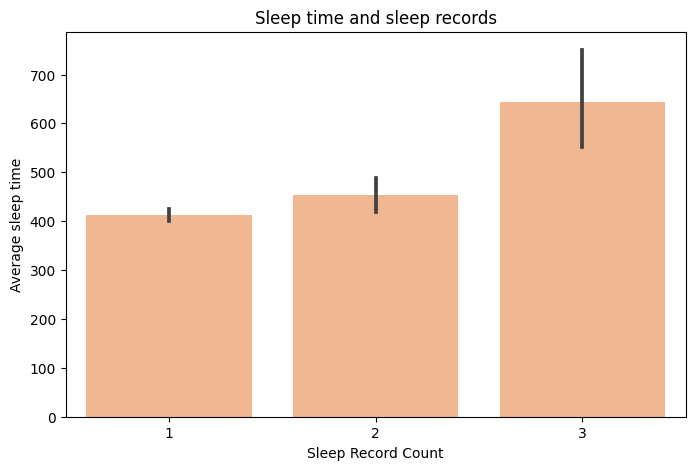

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=daily_sleep,
    x="total_sleep_records",
    y="total_minutes_asleep",
    estimator="mean",
    color=sns.color_palette("pastel")[1]
)
plt.ylabel("Average sleep time")
plt.xlabel("Sleep Record Count")
plt.title("Sleep time and sleep records")
plt.show()


* Số lần ngủ càng nhiều thì tổng thời gian ngủ trung bình càng tăng.

* Ngủ 2 lần/ngày có vẻ hợp lý nhất: vừa cải thiện thời lượng ngủ, vừa không biến động quá lớn.

* Ngủ 3 lần/ngày có thể dẫn đến tình trạng ngủ quá nhiều ảnh hưởng đến chất lượng giấc ngủ.

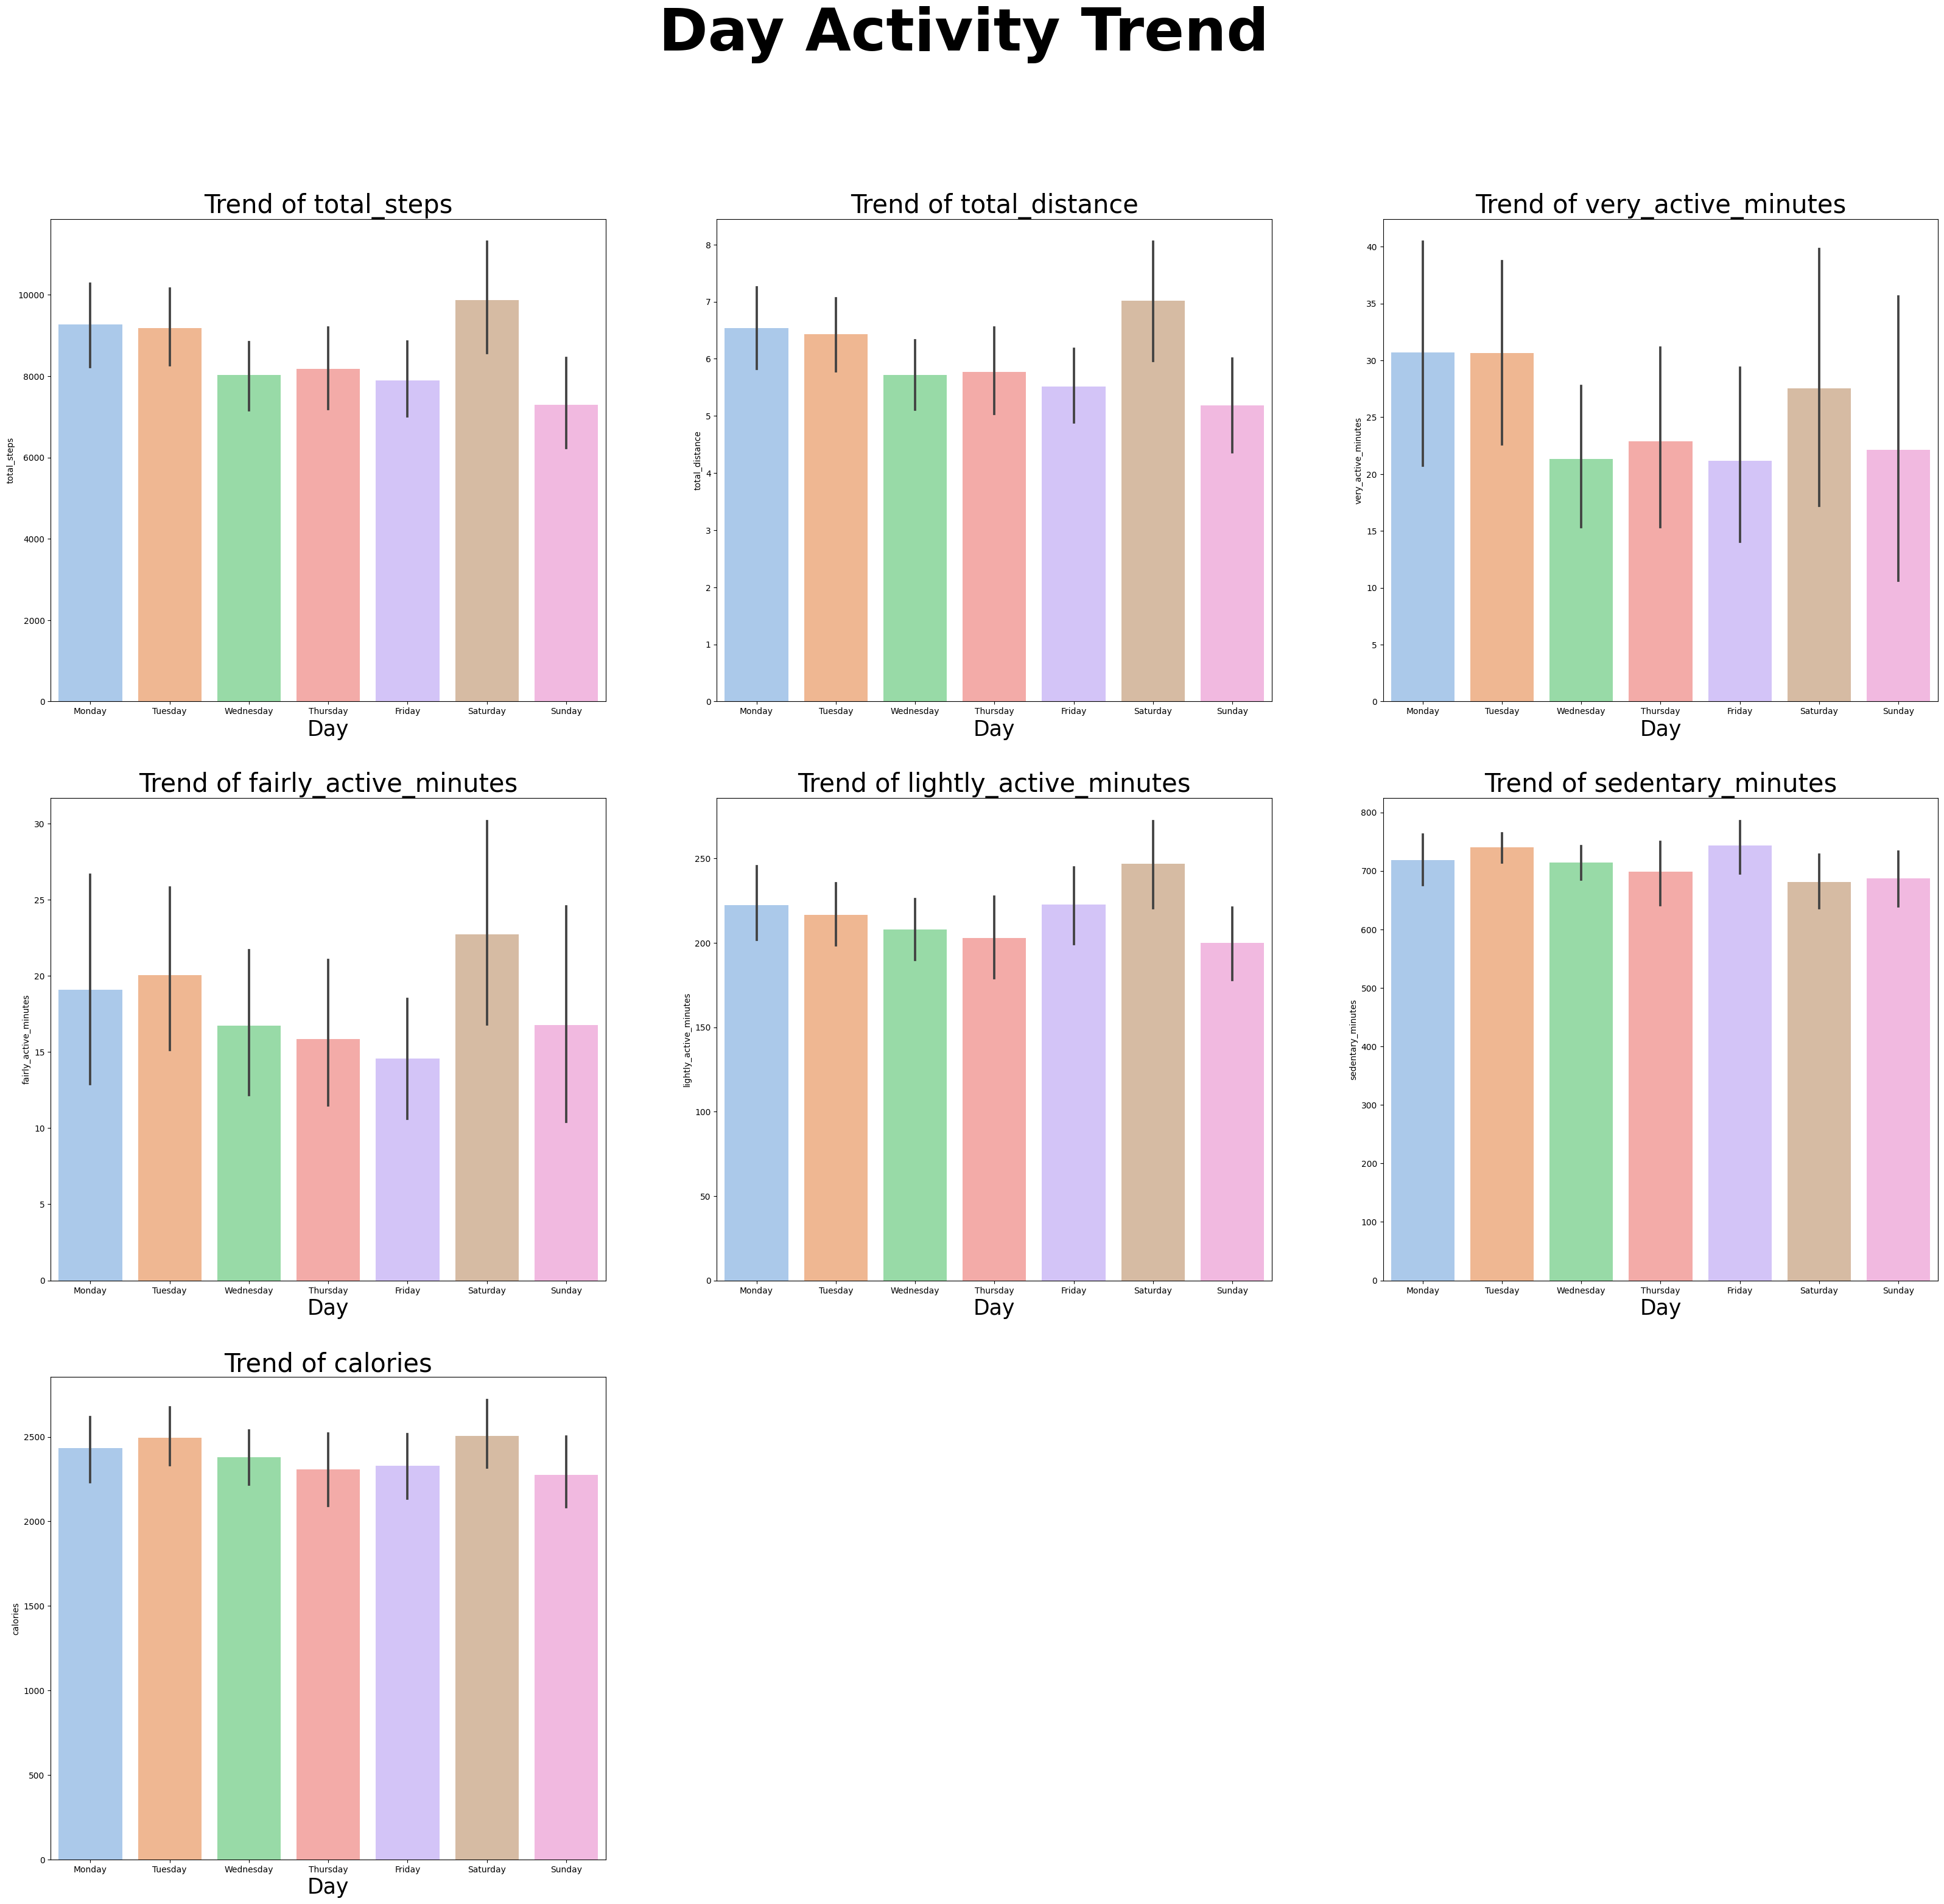

In [39]:
activity_col = ['total_steps', 'total_distance', 'very_active_minutes', 'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes', 'calories']
figure = plt.figure(figsize = (40,35))
plt.suptitle('Day Activity Trend', fontsize = 70, weight = 'bold')

for i,col in enumerate(activity_col):
    plt.subplot(3,3,i+1)
    sns.barplot(daily_sleep, x = 'week_day',order = order, y=activity_col[i], palette = "pastel")
    plt.title(f'Trend of {activity_col[i]}', size=30)
    plt.xlabel('Day', size=25)
    plt.ylabel(f'{activity_col[i]}')

plt.show()

* Thứ Bảy là ngày hoạt động nhiều nhất: nhiều bước chân, quãng đường xa, thời gian vận động cao → nhiều calo.

* Chủ Nhật là ngày ít hoạt động nhất: ít bước chân, ít vận động, calo thấp → nhiều khả năng dành cho nghỉ ngơi.

* Ngày giữa tuần (đặc biệt Thứ Năm & Thứ Sáu): ít hoạt động hơn có thể do mệt mỏi giữa tuần stress công việc/học tập 

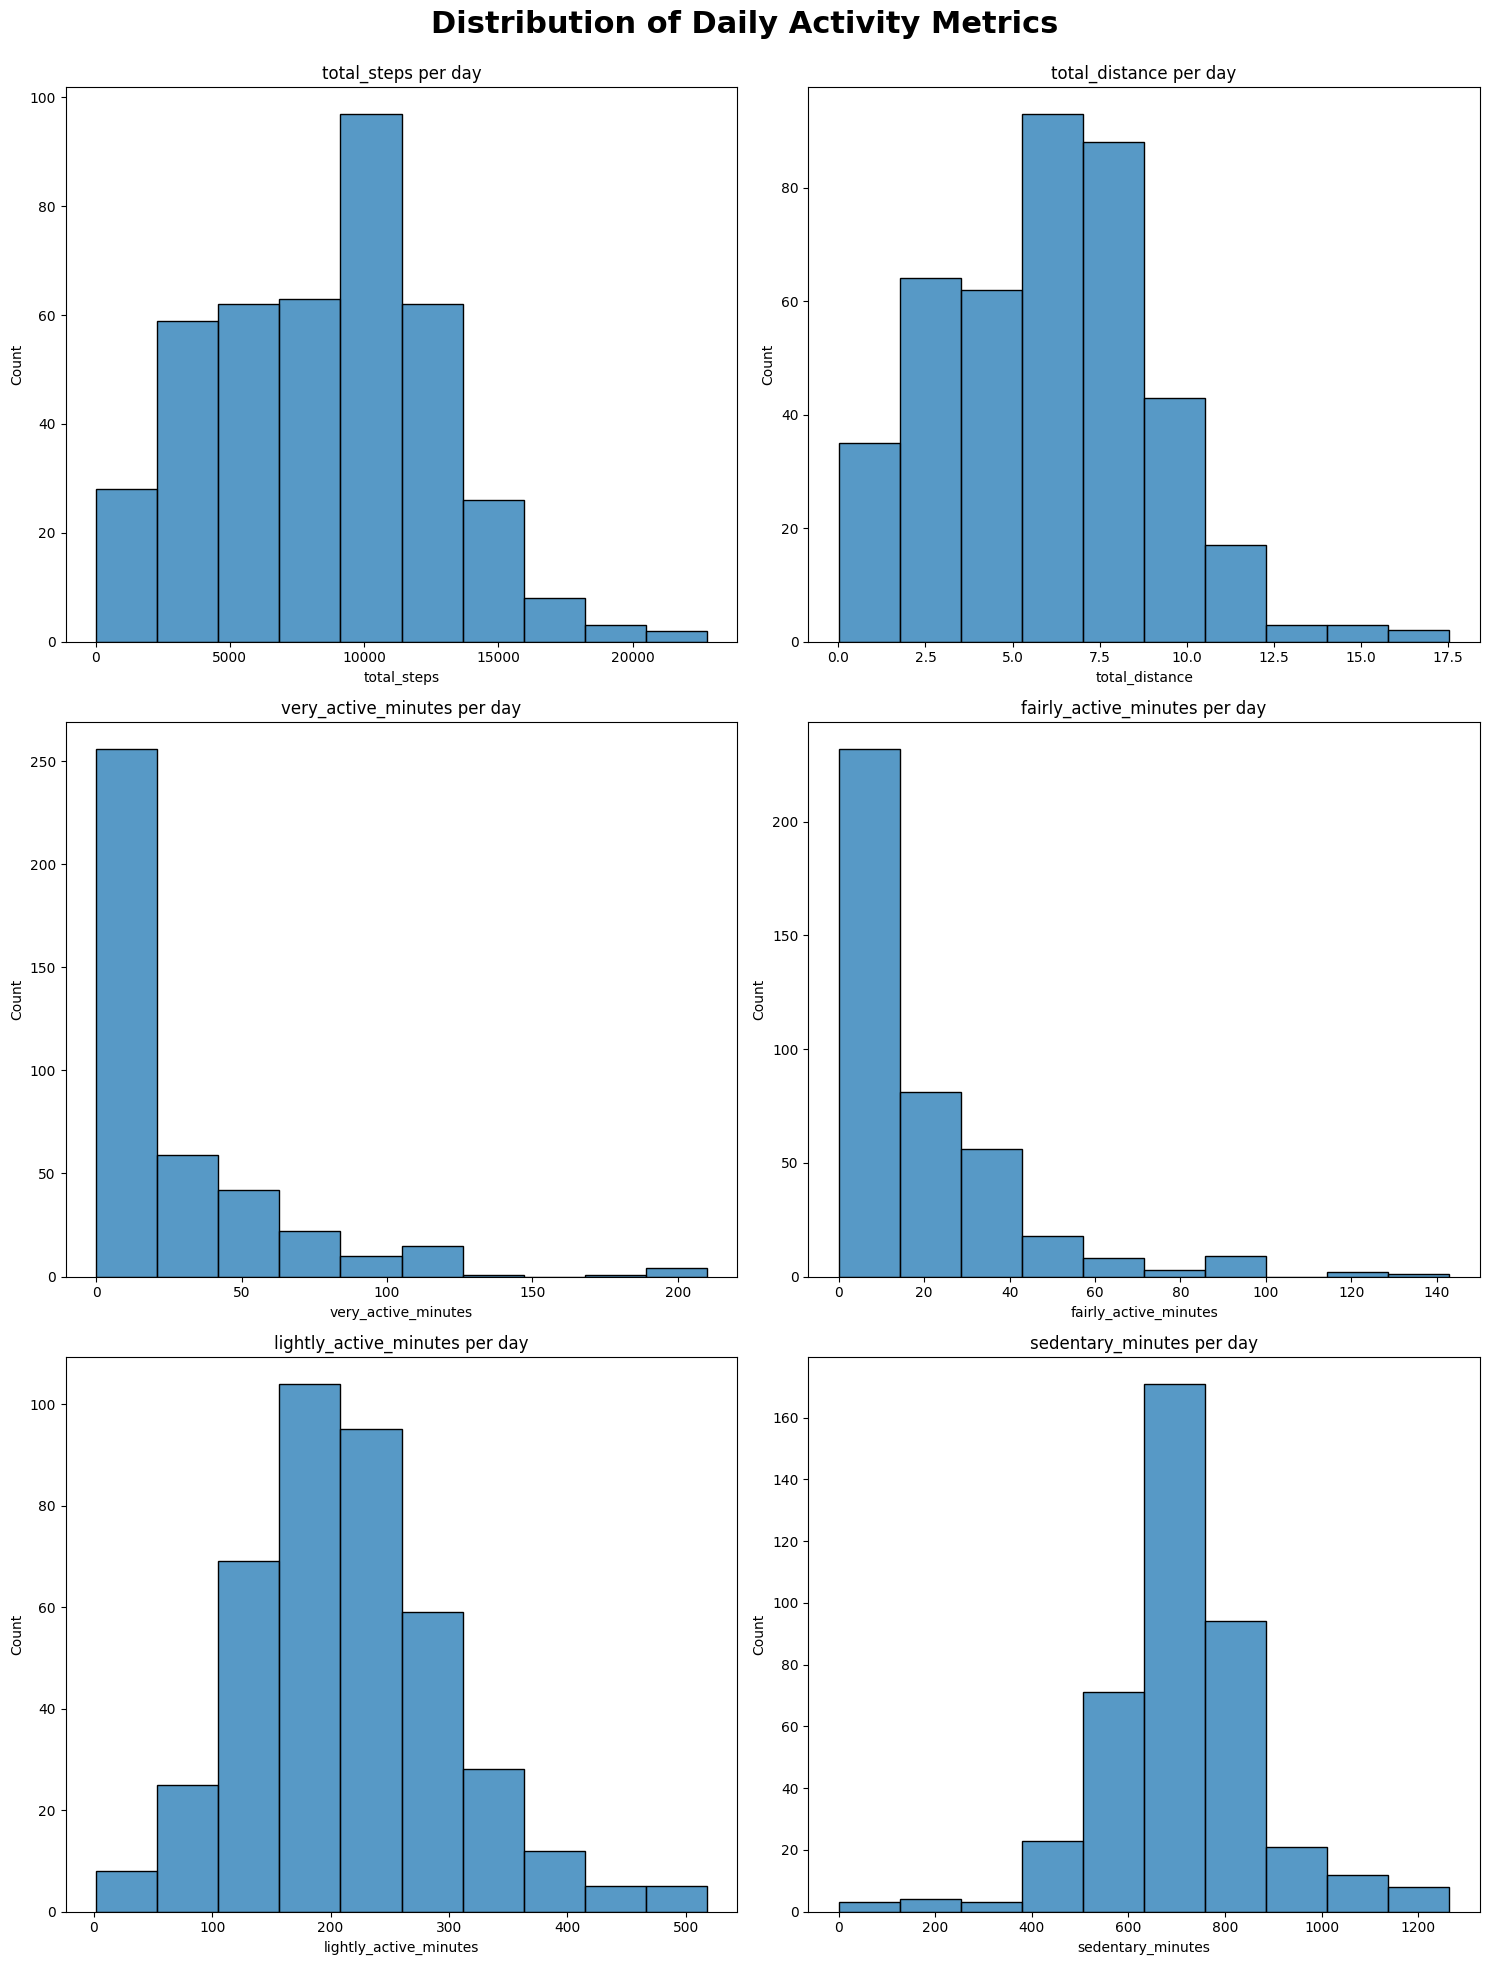

In [40]:
activity_col = [
    'total_steps', 'total_distance', 'very_active_minutes',
    'fairly_active_minutes', 'lightly_active_minutes',
    'sedentary_minutes'
]

figure = plt.figure(figsize = (15,20))

for  i,col in enumerate(activity_col):
    plt.subplot(3,2,i+1)
    sns.histplot(daily_sleep[activity_col[i]], bins = 10)
    plt.title(f"{activity_col[i]} per day")
    plt.xlabel(f'{activity_col[i]}')
    plt.ylabel('Count')

plt.tight_layout(rect=[0,0,1,0.96])
plt.suptitle("Distribution of Daily Activity Metrics", fontsize=22, weight="bold");



* Người dùng có xu hướng ít vận động mạnh, thay vào đó chủ yếu là vận động nhẹ và thời gian ngồi nhiều.


## Kết luận
* Người dùng có xu hướng ngủ muộn, dậy muộn; cuối tuần mất nhiều thời gian để vào giấc — có khả năng bị ảnh hưởng bởi thiết bị điện tử, caffeine/đồ uống kích thích, hoặc thay đổi lịch sinh hoạt.

* Chất lượng giấc ngủ tốt nhất rơi vào Thứ 4–Thứ 7; kém nhất Chủ Nhật –>Thứ 3 → phản ánh áp lực/lo lắng đầu tuần và thay đổi nhịp sinh học giữa tuần/cuối tuần.

* Hoạt động & ngủ: Giấc ngủ tốt liên quan tới nhiều hoạt động nhẹ trong ngày (lightly active) hơn là chỉ vận động mạnh. Ngược lại, nhóm có nhiều hoạt động fairly active/mạnh không đồng nghĩa ngủ tốt — có thể do phân bổ hoạt động chưa hợp lý hoặc gắng sức.

* Người có 1 giấc chính, hoặc 2 giấc/ngày có chất lượng tổng thể tốt hơn; ngủ 3 lần/ngày dễ dẫn đến ngủ quá nhiều, làm giảm chất lượng.

* Thứ Bảy hoạt động cao nhất; Chủ Nhật hoạt động thấp nhất — đây là thói quen tuần điển hình có thể tận dụng cho chiến dịch cuối tuần vs chuẩn bị cho tuần mới.

## Giải pháp
* Nhắc nhở giúp người dùng ngủ đúng giờ.
* Gợi ý các hoạt động vận động nhẹ nhàng (walk, yoga, stretching).
* Tận dụng insight thứ bảy hoạt động cao và chủ nhật hđ thấp gợi ý hoạt động thử thách cuối tuần
* Tạo app challenges người dùng sẽ nhận được huy hiệu nếu như hoàn thành challenges sau đó có thể chia sẻ thành tích lên mạng xã hội tạo động lực cho những người dùng khác
* Thu thập thêm dữ liệu như giới tính, tuổi tác hoặc nghề nghiệp để hiểu rõ hơn về người dùng